In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("iris_with_12_missing_values.csv")

In [3]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           NaN          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
print(df.shape)

(150, 5)


In [9]:
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 sepal_length    3
sepal_width     3
petal_length    3
petal_width     3
species         0
dtype: int64


In [11]:
# Handling missing values: Impute only numerical columns with mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

In [12]:
missing_values = df.isnull().sum()
print("Missing values after imputation:\n", missing_values)

Missing values after imputation:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [18]:
# Summary statistics
print("Detailed EDA")
print("-----------------")
print("\nSummary Statistics:\n", df.describe())

Detailed EDA
-----------------

Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.857143     3.058503      3.753061     1.212245    1.000000
std        0.819396     0.429272      1.737054     0.755641    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.300000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


Univariate Analysis
---------------------


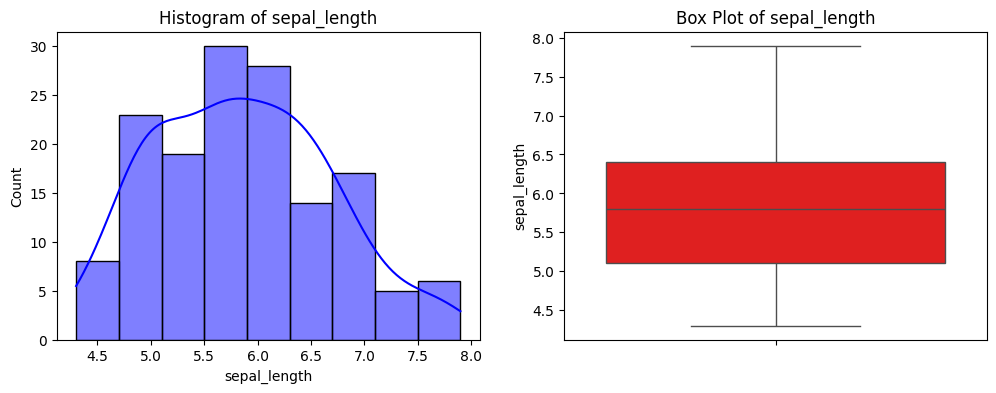

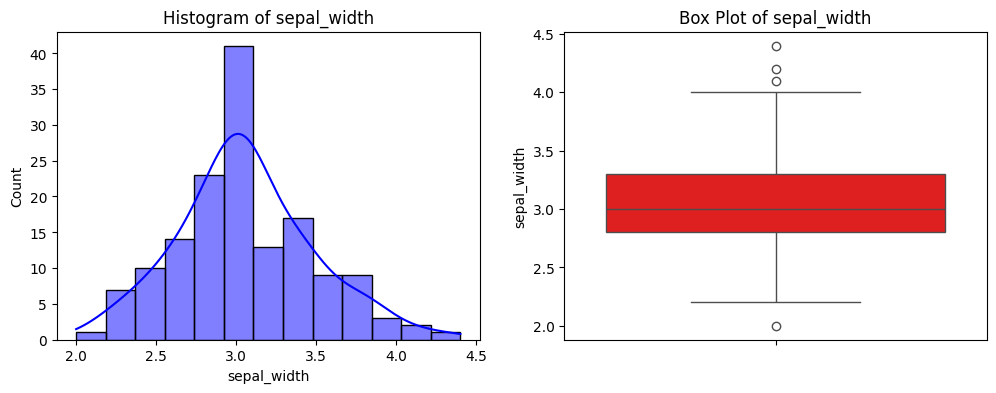

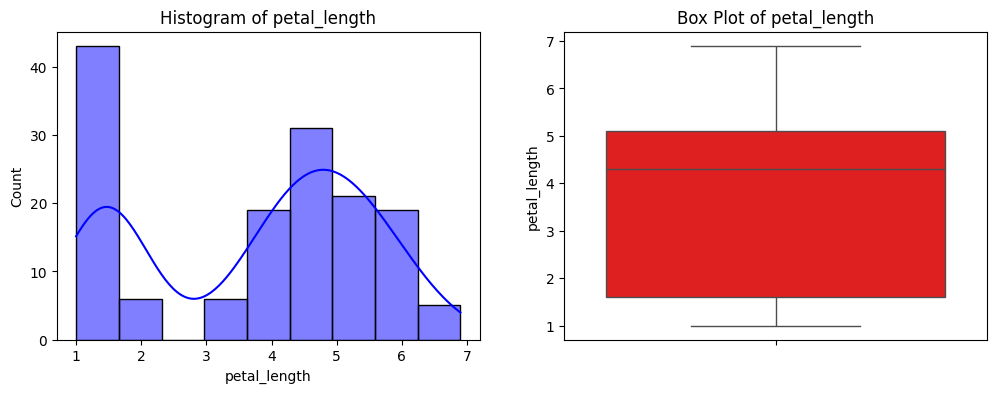

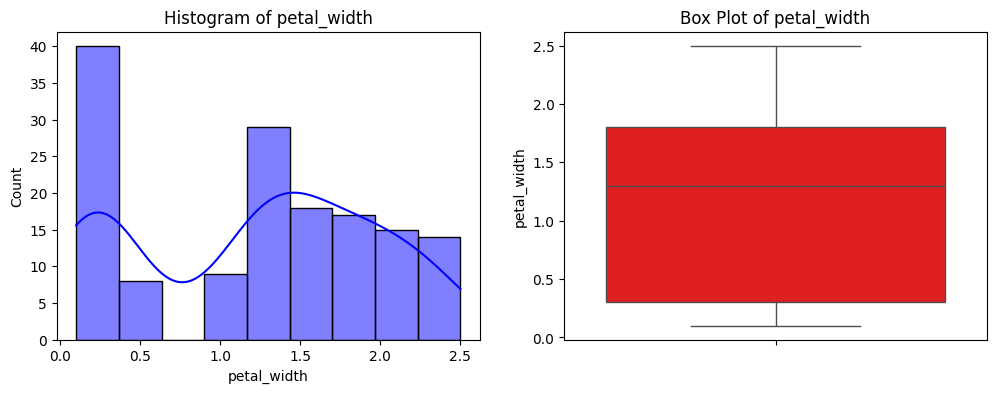

In [19]:
print("Univariate Analysis")
print("---------------------")
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color="blue")
    axes[0].set_title(f'Histogram of {col}')
    
    # Box Plot
    sns.boxplot(y=df[col], ax=axes[1], color="red")
    axes[1].set_title(f'Box Plot of {col}')

    plt.show()
    

Bivariate Analysis


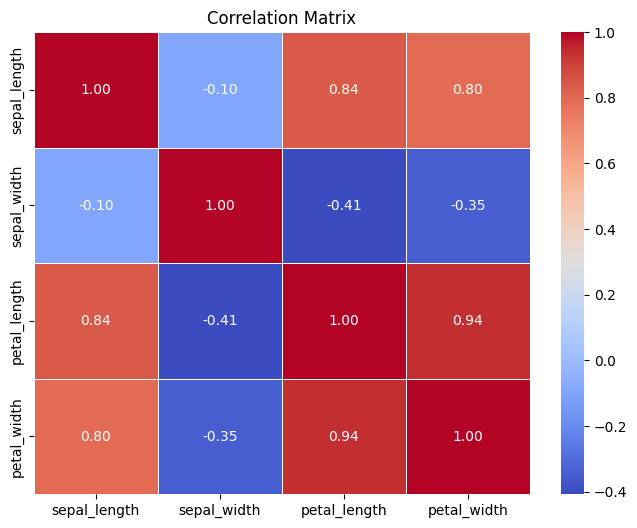

In [20]:
# Correlation Matrix Heatmap
print("Bivariate Analysis")
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [16]:
# Encoding categorical labels (species)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [22]:
# Splitting dataset into features and labels
X = df.drop(columns=['species'])  # Features
y = df['species']  # Labels


In [23]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# Define MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

In [26]:
# Make predictions
y_pred = mlp.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


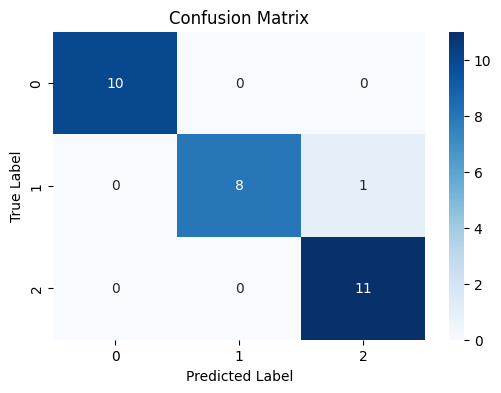

In [32]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()